In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!unzip gdrive/My\ Drive/CNN_assignment.zip

Archive:  gdrive/My Drive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin c

In [7]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Load using keras.preprocessing**


Let's load these images off disk using the helpful image_dataset_from_directory utility.

**Create a dataset**

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## train dataset 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size = batch_size,
                                                               image_size=(img_height,img_width),label_mode='categorical',
                                                               seed=123,subset='training',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## validation dataset 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size = batch_size,
                                                               image_size=(img_height,img_width),label_mode='categorical',
                                                               seed=123,subset='validation',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**

create a code to visualize one instance of all the nine classes present in the dataset

In [13]:
import matplotlib.pyplot as plt

In [14]:
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
  files_path_dict[c]=list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
print(files_path_dict)

Found 2239 files belonging to 9 classes.
{'actinic keratosis': ['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0031335.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029713.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027958.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030408.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029900.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027615.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026149.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030036.jpg', '/content/Skin c

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0031335.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0027057.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0028926.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0011178.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0027958.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0027053.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0011178.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0024710.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Tr

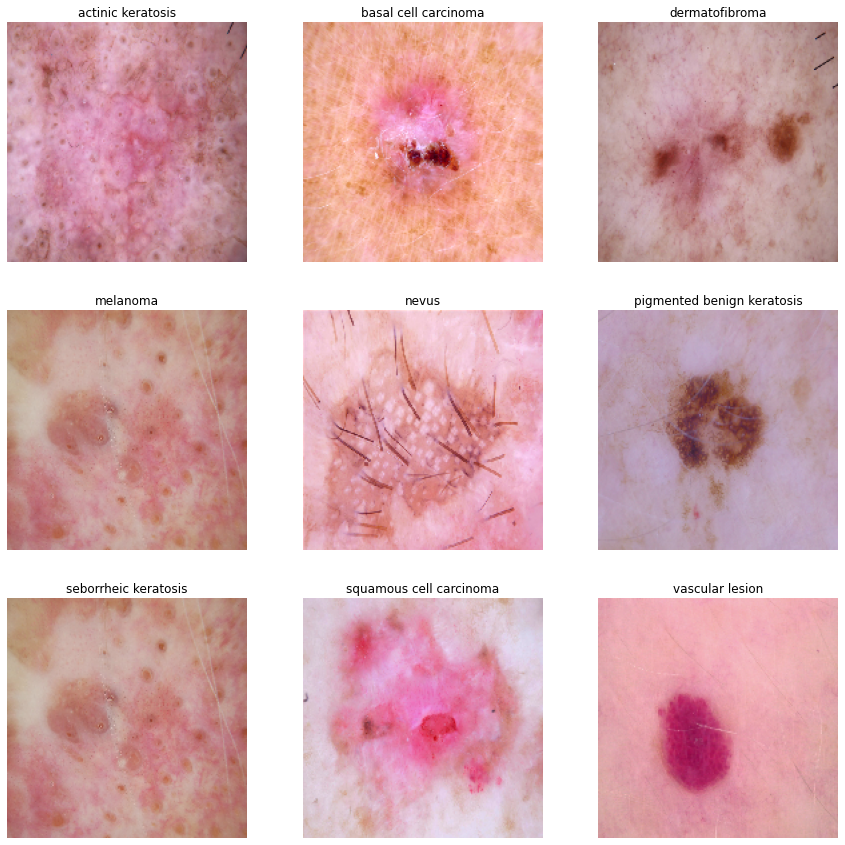

In [15]:
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    print(path_list)
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create the model**

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [17]:
### CNN model architecture
model=Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#first Conv Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#second conv layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#third Conv Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#flatten layer
model.add(layers.Flatten())

#dense layer
model.add(layers.Dense(512,activation='relu'))

#softmax
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 64)        36928     
                                                        

**Compile the model**

Choose an appropirate optimiser and loss function for model training

In [18]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 64)        36928     
                                                        

Train the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 32s 143ms/step - loss: 2.0519 - accuracy: 0.2126 - val_loss: 1.9577 - val_accuracy: 0.2975
Epoch 2/20
56/56 [==============================] - 4s 74ms/step - loss: 1.8386 - accuracy: 0.3253 - val_loss: 1.6219 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 4s 75ms/step - loss: 1.6787 - accuracy: 0.3929 - val_loss: 1.6393 - val_accuracy: 0.4004
Epoch 4/20
56/56 [==============================] - 4s 76ms/step - loss: 1.5776 - accuracy: 0.4336 - val_loss: 1.5362 - val_accuracy: 0.4407
Epoch 5/20
56/56 [==============================] - 4s 74ms/step - loss: 1.5000 - accuracy: 0.4727 - val_loss: 1.5894 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 4s 75ms/step - loss: 1.4320 - accuracy: 0.5011 - val_loss: 1.4381 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 4s 76ms/step - loss: 1.4281 - accuracy: 0.4950 - val_loss: 1.4288 - val_accuracy: 0.5168
Epoch 8/20


Visualizing training results

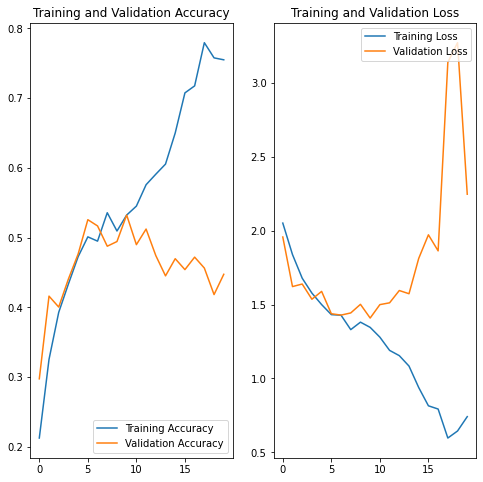

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Training loss decreases while validation loss increases, hence model is overfitting.

In [22]:
# choose an appropriate data augumentation strategy. 
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 1795 images belonging to 9 classes.


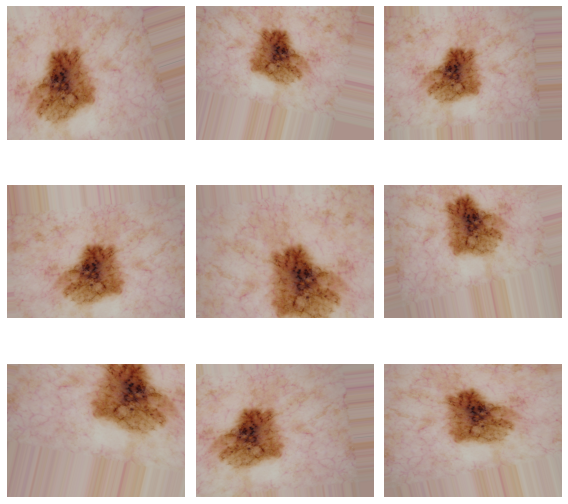

In [28]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
from PIL import Image
img = Image.open("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0009868.jpg")

# Convert the image to a numpy array
img_array = np.array(img)

# Reshape the array to have a batch size of 1
img_array = img_array.reshape((1,) + img_array.shape)

# Generate augmented images
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)
aug_iter = train_datagen.flow(img_array, batch_size=9)

# Plot the augmented images
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
axs = axs.flatten()

for img, ax in zip(aug_iter, axs):
    ax.imshow(img[0])
    ax.axis('off')

plt.tight_layout()
plt.show()

Create the model, compile and train the model

In [29]:
## Use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

# Increse the model size by adding another 32 layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 64 layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 128 layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_3 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 88, 88, 32)      

**Compiling the model**

In [30]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Training the model**

In [31]:
epochs = 20
history = model.fit_generator(
  train_generator,
  validation_data=val_ds,
  epochs=epochs,
)

<ipython-input-31-bb0356f0b8e4>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
57/57 [==============================] - 45s 725ms/step - loss: 8.5167 - accuracy: 0.3136 - val_loss: 4.8526 - val_accuracy: 0.1499
Epoch 2/20
57/57 [==============================] - 43s 744ms/step - loss: 3.1558 - accuracy: 0.4396 - val_loss: 3.0326 - val_accuracy: 0.1499
Epoch 3/20
57/57 [==============================] - 42s 735ms/step - loss: 2.1486 - accuracy: 0.4568 - val_loss: 2.5227 - val_accuracy: 0.1946
Epoch 4/20
57/57 [==============================] - 42s 736ms/step - loss: 1.8851 - accuracy: 0.4585 - val_loss: 2.3778 - val_accuracy: 0.1655
Epoch 5/20
57/57 [==============================] - 42s 731ms/step - loss: 1.7546 - accuracy: 0.4724 - val_loss: 2.3173 - val_accuracy: 0.2103
Epoch 6/20
57/57 [==============================] - 42s 735ms/step - loss: 1.6885 - accuracy: 0.4641 - val_loss: 2.2029 - val_accuracy: 0.2886
Epoch 7/20
57/57 [==============================] - 42s 734ms/step - loss: 1.6617 - accuracy: 0.4730 - val_loss: 1.9024 - val_accuracy: 0.4474

**Visualizing the results**

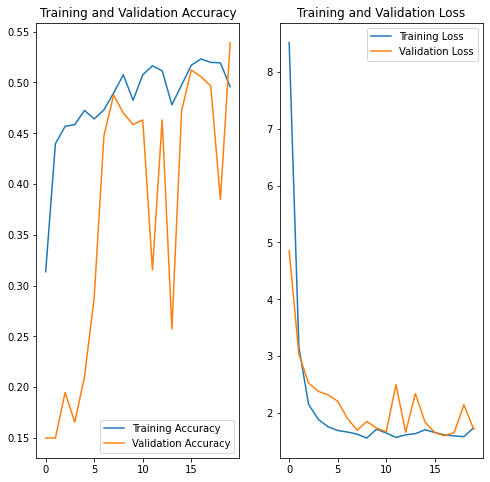

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 - Validation accuracy is increasing and training accuracy is going higher with epochs
 - Validation loss is decreasing and training loss is decreasing while validation loss increases

**Context**: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:
#Visualize distribution of classes in the training dataset.
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,melanoma,438
1,nevus,357
2,dermatofibroma,95
3,squamous cell carcinoma,181
4,basal cell carcinoma,376
5,pigmented benign keratosis,462
6,vascular lesion,139
7,seborrheic keratosis,77
8,actinic keratosis,114


<Axes: xlabel='No. of Image', ylabel='Class'>

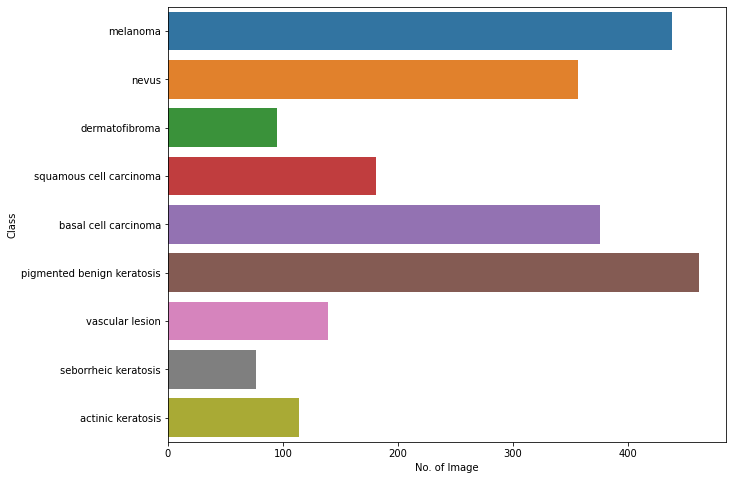

In [34]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

 - **seborrheic keratosis** class has the least number of samples.
 - **pigmented benign keratosis** dominate the data in terms proportionate number of samples.

Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [36]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC7823852E0>: 100%|██████████| 500/500 [00:18<00:00, 26.72 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC6FB0AAD90>: 100%|██████████| 500/500 [00:25<00:00, 19.94 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC6FB100850>: 100%|██████████| 500/500 [00:24<00:00, 20.05 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FC6F05834F0>: 100%|██████████| 500/500 [01:37<00:00,  5.15 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC6F04BB760>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC663AC4D30>: 100%|██████████| 500/500 [00:18<00:00, 27.37 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC6F0512610>: 100%|██████████| 500/500 [00:46<00:00, 10.82 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC663AD96D0>: 100%|██████████| 500/500 [00:19<00:00, 25.38 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC782277370>: 100%|██████████| 500/500 [00:18<00:00, 27.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [38]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010784.jpg_6b903cff-f90a-4fd4-80a4-1836eeb3a293.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010912.jpg_396afd11-f4ba-449d-bed6-9de41655e721.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0009868.jpg_d2822b11-131f-428c-ba81-97ee64eca524.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000139.jpg_7593e111-7fef-4a63-9c07-cf2ad8bd32bf.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000390.jpg_cccd2502-488a-4877-9b29-8acf765be960.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010283.jpg_37ced

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [40]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [41]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()

,Path,Label
0,/content/Skin cancer ISIC The International Sk...,melanoma
1,/content/Skin cancer ISIC The International Sk...,melanoma
2,/content/Skin cancer ISIC The International Sk...,melanoma
3,/content/Skin cancer ISIC The International Sk...,melanoma
4,/content/Skin cancer ISIC The International Sk...,melanoma


In [42]:
df2['Label'].value_counts()

melanoma                      500
nevus                         500
dermatofibroma                500
squamous cell carcinoma       500
basal cell carcinoma          500
pigmented benign keratosis    500
vascular lesion               500
seborrheic keratosis          500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

**Train the model on the data created using Augmentor**

In [43]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [44]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [46]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create your model (make sure to include normalization)**

In [47]:
## Your code goes here
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

# Increse the model size by adding another 32 layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))

# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 64 layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))

# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 128 layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))

# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 88, 88, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 86, 86, 64)        18496     
                                                      

**Compile your model (Choose optimizer and loss function appropriately)**

In [48]:

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train your model**

In [49]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/50
169/169 [==============================] - 50s 148ms/step - loss: 2.9648 - accuracy: 0.1350 - val_loss: 2.1937 - val_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 17s 101ms/step - loss: 2.1866 - accuracy: 0.1371 - val_loss: 2.1884 - val_accuracy: 0.1403
Epoch 3/50
169/169 [==============================] - 17s 103ms/step - loss: 2.1842 - accuracy: 0.1473 - val_loss: 2.1897 - val_accuracy: 0.1403
Epoch 4/50
169/169 [==============================] - 18s 106ms/step - loss: 2.1779 - accuracy: 0.1443 - val_loss: 2.1874 - val_accuracy: 0.1403
Epoch 5/50
169/169 [==============================] - 17s 102ms/step - loss: 2.1767 - accuracy: 0.1426 - val_loss: 2.1880 - val_accuracy: 0.1403
Epoch 6/50
169/169 [==============================] - 18s 104ms/step - loss: 2.1767 - accuracy: 0.1437 - val_loss: 2.1880 - val_accuracy: 0.1403
Epoch 7/50
169/169 [==============================] - 17s 102ms/step - loss: 2.1762 - accuracy: 0.1424 - val_loss: 2.1877 - val_ac

**Visualize the model results**

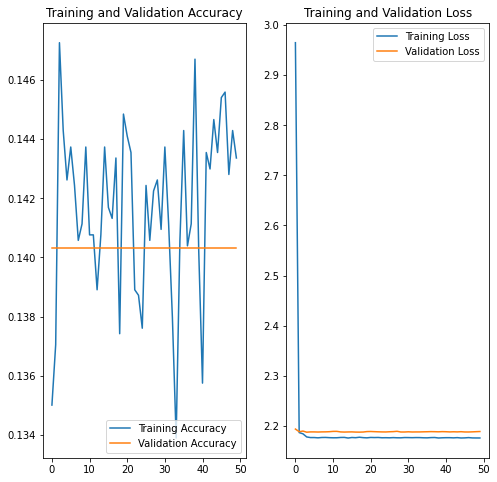

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Yes, we got rid of overfitting and model is performing better after doing class imbalance.

1/1 [==============================] - 0s 327ms/step
Actual Class pigmented benign keratosis
Predictive Class pigmented benign keratosis


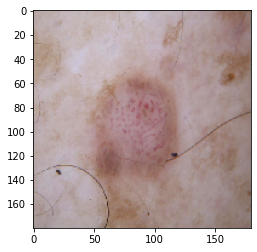

In [51]:
# Prediction
Test_image_path = os.path.join(data_dir_test, class_names[5], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[5] +'\n'+ "Predictive Class "+pred_class )